findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


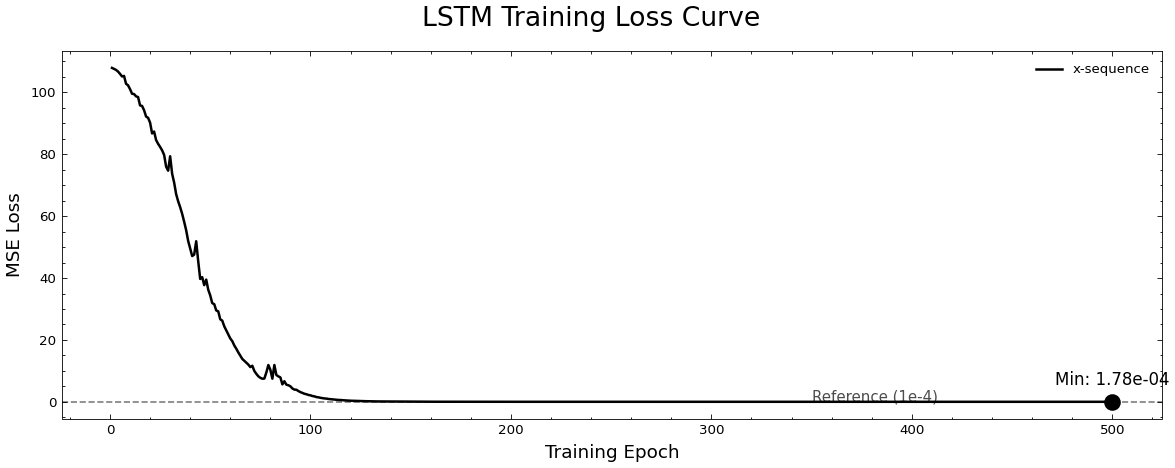

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

# 用 scienceplots 的 IEEE 样式
plt.style.use(['science', 'ieee'])
plt.rcParams['figure.dpi'] = 120
plt.rcParams['text.usetex'] = False  # 如果没有安装 LaTeX

# 读取数据
df_x = pd.read_csv('model_x_training_history.csv')

# 准备 numpy array
epochs = df_x['epoch'].to_numpy()
losses = df_x['loss'].to_numpy()

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('LSTM Training Loss Curve', fontsize=16)

# 绘制曲线
ax.plot(epochs, losses, linewidth=1.5, label='x-sequence')

# 标记最小 loss
min_idx   = losses.argmin()
min_epoch = epochs[min_idx]
min_loss  = losses[min_idx]
ax.scatter(min_epoch, min_loss, s=80, edgecolor='black', zorder=5)
ax.annotate(f'Min: {min_loss:.2e}',
            (min_epoch, min_loss),
            textcoords="offset points", xytext=(0, 10), ha='center',
            fontsize=10)

# 参考线
ax.axhline(1e-4, linestyle='--', alpha=0.5)
ax.text(0.7 * epochs.max(), 1.2e-4,
        'Reference (1e-4)', fontsize=9, alpha=0.7)

# 标签和图例
ax.set_xlabel('Training Epoch', fontsize=11)
ax.set_ylabel('MSE Loss', fontsize=11)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('LSTM_training_loss_x_only.pdf', dpi=500, bbox_inches='tight')
plt.show()
